In [32]:
import os
import numpy as np
import shutil
import random

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, losses

In [2]:
#Organize Leaf data into train,validation and test directories
os.chdir('dataset_classes')

if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('validation')
    os.mkdir('test')
    
    for i in range(0,5):
        shutil.move(f'{i}','train')
        os.mkdir(f'validation/{i}')
        os.mkdir(f'test/{i}')
        
        validation_sample = random.sample(os.listdir(f'train/{i}'),159)
        for j in validation_sample:
            shutil.move(f'train/{i}/{j}',f'validation/{i}')
        
        test_sample = random.sample(os.listdir(f'train/{i}'),160)
        for k in test_sample:
            shutil.move(f'train/{i}/{k}',f'test/{i}')
os.chdir('../..')

In [3]:
train_data_path = r"E:\Semester 6\Project-Leaf_disease_classification\dataset_classes\train"
validation_data_path = r"E:\Semester 6\Project-Leaf_disease_classification\dataset_classes\validation"
test_data_path = r"E:\Semester 6\Project-Leaf_disease_classification\dataset_classes\test"

print('total training set1 images:', len(os.listdir(train_data_path)))

total training set1 images: 5


In [4]:
#TRAINING_DIR = r"E:\Semester 6\Project-Leaf_disease_classification\dataset_classes\train"
training_datagen = ImageDataGenerator(
                        rescale = 1./255)


#VALIDATION_DIR = r"E:\Semester 6\Project-Leaf_disease_classification\dataset_classes\validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
train_generator = training_datagen.flow_from_directory(
    train_data_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 6360 images belonging to 5 classes.
Found 795 images belonging to 5 classes.


In [6]:
import math

BATCH_SIZE=32

TRAINING_SIZE = 6360

VALIDATION_SIZE = 795

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)

In [35]:
initializer = tf.keras.initializers.HeNormal()


In [38]:
model = tf.keras.models.Sequential([
        # Here, we use a larger 11 x 11 window to capture objects. At the same
        # time, we use a stride of 4 to greatly reduce the height and width of
        # the output. Here, the number of output channels is much larger than
        # that in LeNet
        tf.keras.layers.Conv2D(filters=96, kernel_size=11,kernel_initializer=initializer, strides=4,
                               activation='relu',input_shape = (224,224,3)),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # Make the convolution window smaller, set padding to 2 for consistent
        # height and width across the input and output, and increase the
        # number of output channels
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # Use three successive convolutional layers and a smaller convolution
        # window. Except for the final convolutional layer, the number of
        # output channels is further increased. Pooling layers are not used to
        # reduce the height and width of input after the first two
        # convolutional layers
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        # Here, the number of outputs of the fully-connected layer is several
        # times larger than that in LeNet. Use the dropout layer to mitigate
        # overfitting
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # Output layer. Since we are using Fashion-MNIST, the number of
        # classes is 10, instead of 1000 as in the paper
        tf.keras.layers.Dense(5,activation='softmax')])


In [39]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 256)      

In [40]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [42]:
history = model.fit(
    train_generator, 
    epochs=15, 
    steps_per_epoch=steps_per_epoch, 
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=val_steps)

Epoch 1/15
199/199 [==============================] - 656s 3s/step - loss: 0.9436 - accuracy: 0.6044 - val_loss: 0.4008 - val_accuracy: 0.8579
Epoch 2/15
199/199 [==============================] - 550s 3s/step - loss: 0.3953 - accuracy: 0.8553 - val_loss: 0.2533 - val_accuracy: 0.9132
Epoch 3/15
199/199 [==============================] - 518s 3s/step - loss: 0.2458 - accuracy: 0.9167 - val_loss: 0.1900 - val_accuracy: 0.9258
Epoch 4/15
199/199 [==============================] - 504s 3s/step - loss: 0.1958 - accuracy: 0.9299 - val_loss: 0.1765 - val_accuracy: 0.9358
Epoch 5/15
199/199 [==============================] - 504s 3s/step - loss: 0.1324 - accuracy: 0.9525 - val_loss: 0.1434 - val_accuracy: 0.9472
Epoch 6/15
199/199 [==============================] - 505s 3s/step - loss: 0.1116 - accuracy: 0.9629 - val_loss: 0.1010 - val_accuracy: 0.9585
Epoch 7/15
199/199 [==============================] - 503s 3s/step - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.1819 - val_accuracy: 0.9296

In [43]:
#!mkdir -p saved_model
model.save('saved_model/model_Alexnet_test1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/model_Alexnet_test1\assets


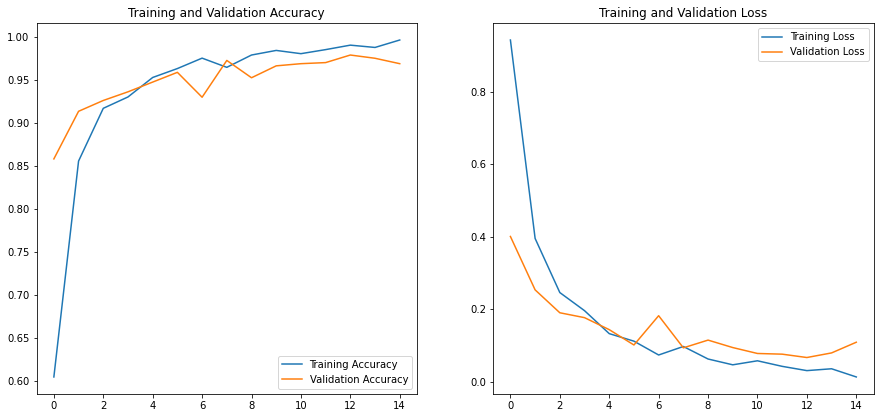

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [46]:
#test_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale = 1./255)


test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 800 images belonging to 5 classes.


In [47]:
target_names = ['Bacterial_spot(Class 0)','Healthy(Class 1)','Late_blight(Class 2)','Septoria_leaf_spot(Class 3)','Yellow_curl_virus(Class 4)']

In [48]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(10,10))


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()


    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")

    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


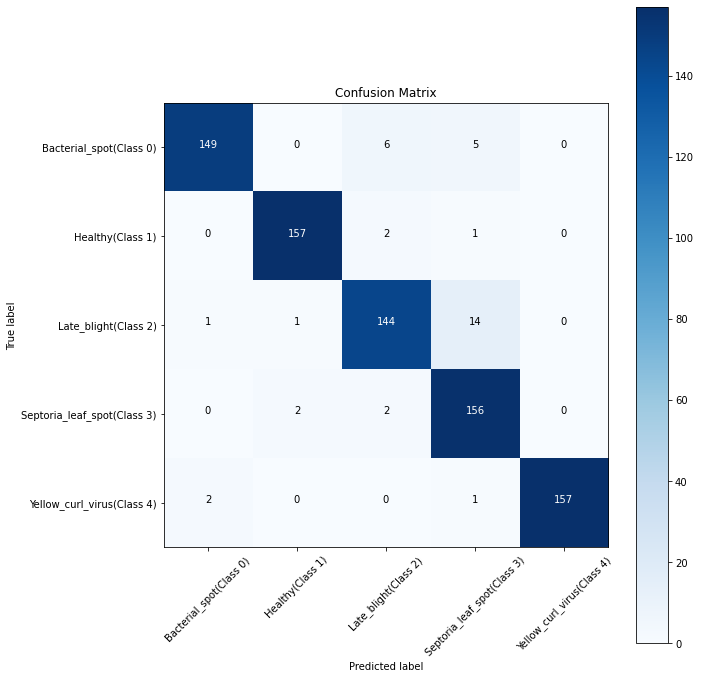

In [49]:
#Confution Matrix 

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [50]:
#Print Classification Report

print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                             precision    recall  f1-score   support

    Bacterial_spot(Class 0)       0.98      0.93      0.96       160
           Healthy(Class 1)       0.98      0.98      0.98       160
       Late_blight(Class 2)       0.94      0.90      0.92       160
Septoria_leaf_spot(Class 3)       0.88      0.97      0.93       160
 Yellow_curl_virus(Class 4)       1.00      0.98      0.99       160

                   accuracy                           0.95       800
                  macro avg       0.96      0.95      0.95       800
               weighted avg       0.96      0.95      0.95       800



In [51]:
model.evaluate(test_generator)

25/25 [==============================] - 12s 488ms/step - loss: 0.1654 - accuracy: 0.9538


[0.1653633862733841, 0.9537500143051147]